In [3]:
import pandas as pd
df = pd.read_pickle('data/intersection_of_visits.pkl')

The dataframe contains all sendBeacon calls grouped for each visit made, here we explode the dataframe and make a row for every single sendBeacon call.

In [4]:
from python.unfold_sendBeacon_calls import unfold_sendBeacon_calls

df_unfolded = unfold_sendBeacon_calls(df)

display(df_unfolded)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://cf.bstatic.com/static/js/main_cloudfro...,https://www.booking.com/js_tracking?lang=en-gb...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtm.js?id=GTM...,https://www.google.com/pagead/landing?gcs=G11-...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://stats.g.doubleclick.net/g/collect?v=2&...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://sc-static.net/scevent.min.js,https://tr.snapchat.com/p,"{""ctx"":{""bt"":""1d53c387"",""c1"":""fd2b9937-426b-40..."
...,...,...,...,...,...,...
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://f.vimeocdn.com/js_opt/modules/utils/vu...,https://vimeo.com/ablincoln/vuid?pid=cae73d017...,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]


The above table shows all sendBeacon calls made, now we can map the URLs of these sendBeacon calls to show what parties make and receive sendBeacon calls.
When no source or target url is given then the source/target is the first party.

In [5]:
import tldextract
import json

with open('domain_map.json') as f:
    domain_map = json.loads(f.read())

def same_domain(url_a, url_b):
    tld_extract_a = tldextract.extract(url_a)
    tld_extract_b = tldextract.extract(url_b)
    return tld_extract_a.registered_domain == tld_extract_b.registered_domain

def get_entity_name(url, initialUrl=''):
    if url == '' or same_domain(url, initialUrl):
        return 'First Party'
    tld_extract = tldextract.extract(url)
    domain_name = tld_extract.registered_domain
    if domain_name in domain_map:
        return domain_map[domain_name]['entityName']
    else:
        return domain_name

def get_domain_name(url, initialUrl=''):
    if url == '' or same_domain(url, initialUrl):
        return 'First Party'
    tld_extract = tldextract.extract(url)
    return tld_extract.registered_domain

The following code generates a dataframe that show all domain names of the target/sources making a sendBeacon call.

In [6]:
df_domains = df_unfolded.copy()
df_domains['source'] = df_unfolded.apply(lambda row: get_domain_name(row['source'], row['initialUrl']), axis=1)
df_domains['target'] = df_unfolded.apply(lambda row: get_domain_name(row['target']), axis=1)
display(df_domains)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,First Party,booking.com,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,googletagmanager.com,google.com,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,googletagmanager.com,google.com,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,googletagmanager.com,doubleclick.net,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,sc-static.net,snapchat.com,"{""ctx"":{""bt"":""1d53c387"",""c1"":""fd2b9937-426b-40..."
...,...,...,...,...,...,...
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,vimeocdn.com,vimeo.com,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,googletagmanager.com,google.com,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,googletagmanager.com,google.com,[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,googletagmanager.com,google-analytics.com,[]


The following code generates a dataframe that shows all entities making/receiving sendBeacon calls.

In [7]:
df_entities = df_unfolded.copy()
df_entities['source'] = df_unfolded.apply(lambda row: get_entity_name(row['source'], row['initialUrl']), axis=1)
df_entities['target'] = df_unfolded.apply(lambda row: get_entity_name(row['target']), axis=1)
display(df_entities)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,First Party,Booking.com B.V.,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Google LLC,Google LLC,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Google LLC,Google LLC,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Google LLC,Google LLC,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Snap Inc.,Snap Inc.,"{""ctx"":{""bt"":""1d53c387"",""c1"":""fd2b9937-426b-40..."
...,...,...,...,...,...,...
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,"Vimeo, LLC","Vimeo, LLC",[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,Google LLC,Google LLC,[]
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,Google LLC,Google LLC,[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,Google LLC,Google LLC,[]


Here we display some basic numbers about the entities:

In [20]:
print("Visits containing sendBeacon call for either optIn or optOut: {}".format(len(df_unfolded.groupby(['initialUrl']))))
print("Num. of different third-party domains making sendBeacon calls: {}".format(len(df_domains.groupby(['source']))-1))
print("Num. of different third-party domains receiving sendBeacon calls: {}".format(len(df_domains.groupby(['target']))-1))
print("Num. of different third-party entities making sendBeacon calls: {}".format(len(df_entities.groupby(['source']))-1))
print("Num. of different third-party entities receiving sendBeacon calls: {}".format(len(df_entities.groupby(['target']))-1))

Visits containing sendBeacon call for either optIn or optOut: 6992
Num. of different third-party domains making sendBeacon calls: 726
Num. of different third-party domains receiving sendBeacon calls: 1139
Num. of different third-party entities making sendBeacon calls: 629
Num. of different third-party entities receiving sendBeacon calls: 969


The following code retrieves which source and target entities/domains make or receive sendBeacon calls.

In [74]:
def get_source(frame):
    return frame.source

def get_target(frame):
    return frame.target

def get_frame_count(frame, dict, method):
    items = method(frame).value_counts().items()
    for item, _ in items:
        if not item in dict:
            dict[item] = 0
        dict[item] += 1

def get_counts(dataframe, nr_of_items, method):
    dict_optIn = {}

    dataframe[dataframe['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_frame_count(frame, dict_optIn, method))
    dict_optIn = list(reversed(sorted(dict_optIn.items(), key=lambda item: item[1])))

    labels = []
    counts_optIn = []
    for index, (item, count) in enumerate(dict_optIn):
        if index >= nr_of_items:
            break
        counts_optIn.append(count)
        labels.append(item)

    counts_optOut = []
    for label in labels:
        if method == get_source:
            column = 'source'
        else:
            column = 'target'
        counts_optOut.append(len(dataframe[(dataframe[column] == label) & (dataframe['autoconsent_action'] == 'optOut')].groupby('initialUrl')))

    sns_data = {
        'optIn': counts_optIn,
        'optOut': counts_optOut
    }

    return sns_data, labels

data_sources_domains, labels_sources_domains = get_counts(df_domains, 10, get_source)
data_targets_domains, labels_targets_domains = get_counts(df_domains, 10, get_target)
data_sources_entities, labels_sources_entities = get_counts(df_entities, 10, get_source)
data_targets_entities, labels_targets_entities = get_counts(df_entities, 10, get_target)

In [85]:
print("Num. of first parties making sendBeacon calls:", len(df_domains[(df_domains['source'] == 'First Party')].groupby('initialUrl')))
print("Num. of third parties making sendBeacon calls:", len(df_domains[(df_domains['source'] != 'First Party')].groupby('initialUrl')))

Num. of first parties making sendBeacon calls: 964
Num. of third parties making sendBeacon calls: 6583


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_apis_graph(data, labels, xlabel):
    # Create a DataFrame for each consent mode
    sns_df_optIn = pd.DataFrame({'Entity': labels, 'Count': data['optIn'], 'Consent Mode': 'optIn'})
    sns_df_optOut = pd.DataFrame({'Entity': labels, 'Count': data['optOut'], 'Consent Mode': 'optOut'})

    # Concatenate the DataFrames
    sns_df_concatenated = pd.concat([sns_df_optIn, sns_df_optOut])

    # Plotting using Seaborn
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Entity', y='Count', hue='Consent Mode', data=sns_df_concatenated)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Visits')
    plt.xticks(rotation=45)
    plt.legend(title='Consent Mode')
    plt.tight_layout()
    plt.show()

Source domains:


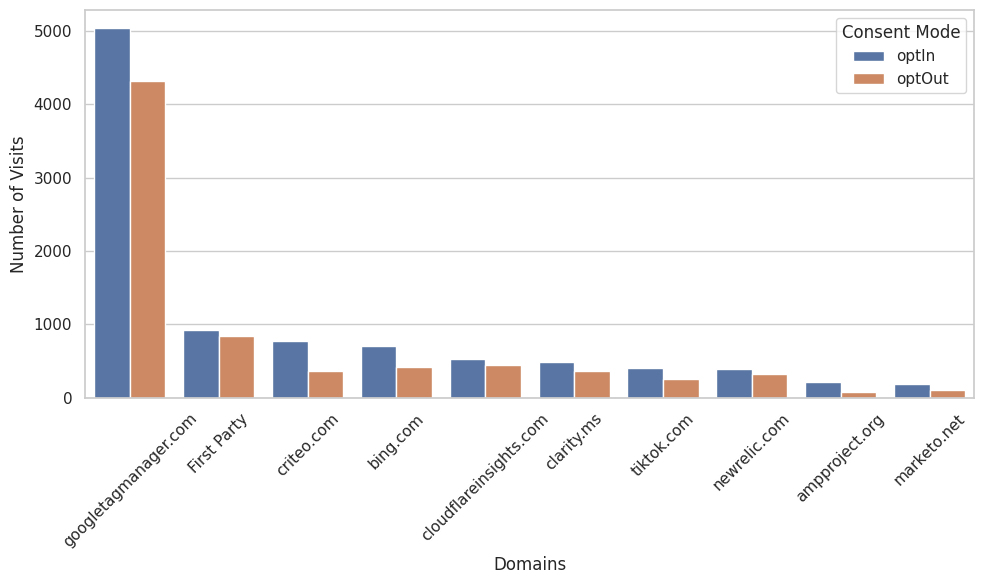

Target domains:


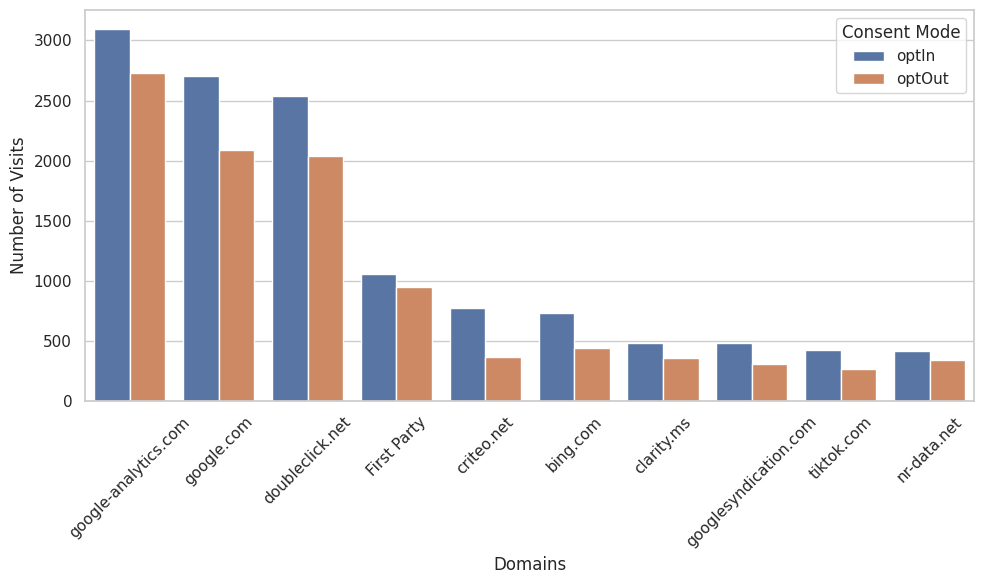

In [76]:
print("Source domains:")
plot_apis_graph(data_sources_domains, labels_sources_domains, 'Domains')
print("Target domains:")
plot_apis_graph(data_targets_domains, labels_targets_domains, 'Domains')

Source entities:


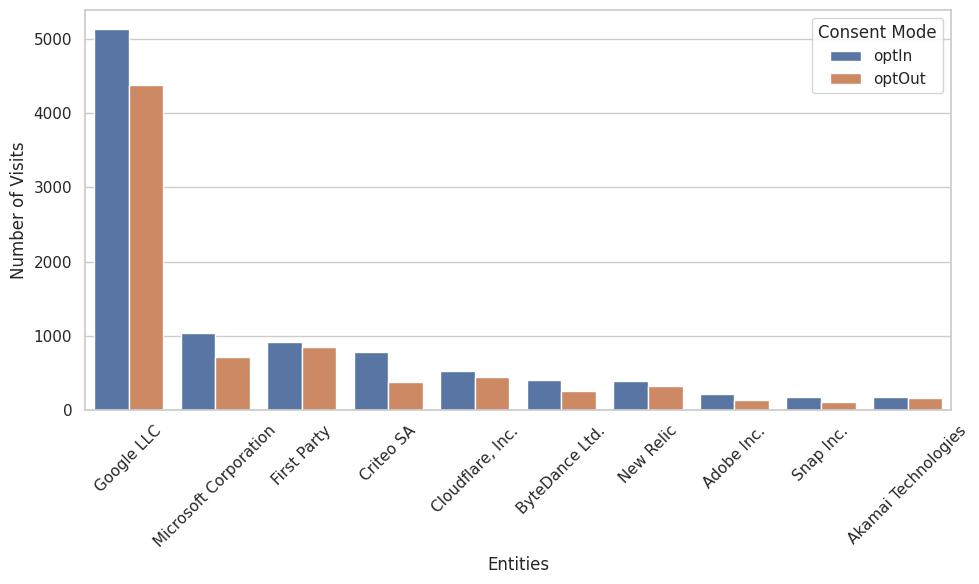

Target entities:


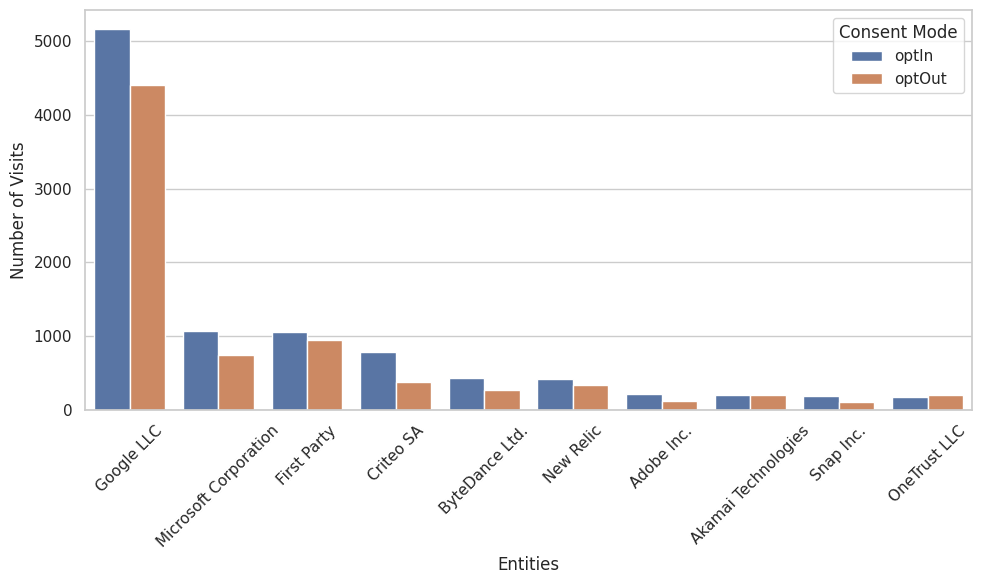

In [77]:
print("Source entities:")
plot_apis_graph(data_sources_entities, labels_sources_entities, 'Entities')
print("Target entities:")
plot_apis_graph(data_targets_entities, labels_targets_entities, 'Entities')